In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [25]:
path = r'/Users/emilypickett/Documents/Medical Cost '

In [26]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'insurance.csv'), index_col = False)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data prep for k-means algorithm

In [46]:
#remove categorical columns
df = df.drop(columns=['sex','smoker','region'])

In [47]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [30]:
#standardization of data 
columns_to_standardize = ['age', 'bmi', 'children', 'charges'] #columns for standardization
scaler = StandardScaler()
df_kmeans_standardized = df_kmeans.copy()  # Create a copy to keep the original DataFrame unchanged
df_kmeans_standardized[columns_to_standardize] = scaler.fit_transform(df_kmeans[columns_to_standardize])

In [31]:
print(df_kmeans_standardized.head())

        age       bmi  children   charges
0 -1.438764 -0.453320 -0.908614  0.298584
1 -1.509965  0.509621 -0.078767 -0.953689
2 -0.797954  0.383307  1.580926 -0.728675
3 -0.441948 -1.305531 -0.908614  0.719843
4 -0.513149 -0.292556 -0.908614 -0.776802


### Elbow Technique

In [48]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [49]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-196074537157.16684,
 -48015231283.25429,
 -22969416864.313755,
 -12124926441.501003,
 -8540631467.91987,
 -6166934812.899778,
 -4435206624.878752,
 -3491380693.4502244,
 -2784143413.525911]

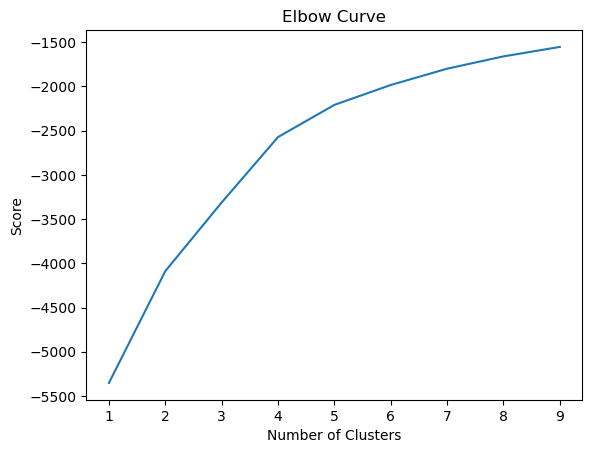

In [34]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a big jump from 0-5, but starts to straighten out at 5. the number of clusters is 5 

### K-means Clustering

In [50]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [51]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [52]:
df['clusters'] = kmeans.fit_predict(df)

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
df.head()

,age,bmi,children,charges,clusters
0,19,27.900,0,16884.92400,2
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,2
4,32,28.880,0,3866.85520,0


In [54]:
df['clusters'].value_counts()

clusters
0    548
3    450
2    174
4     99
1     67
Name: count, dtype: int64

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


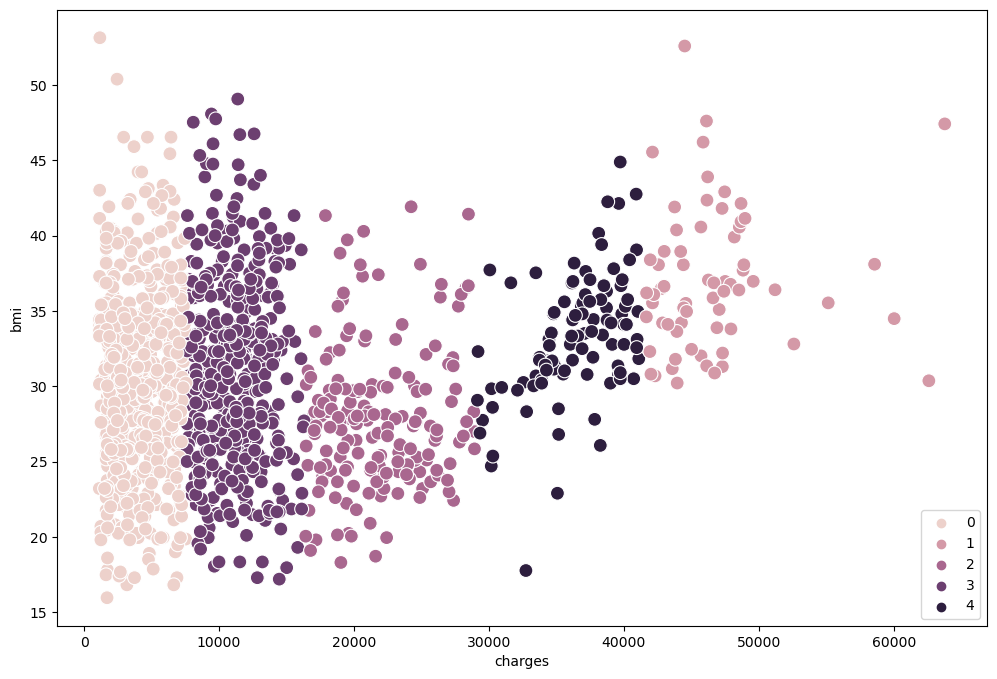

In [55]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['charges'], y=df['bmi'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('charges') # Label x-axis.
plt.ylabel('bmi') # Label y-axis.
plt.show()

Cluster 3 shows that cahrges are higher with mid to high bmi, but cluster 0 shows that charges are low with high bmi, and cluster 1 shows the same small charges from low to mid bmi. 

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


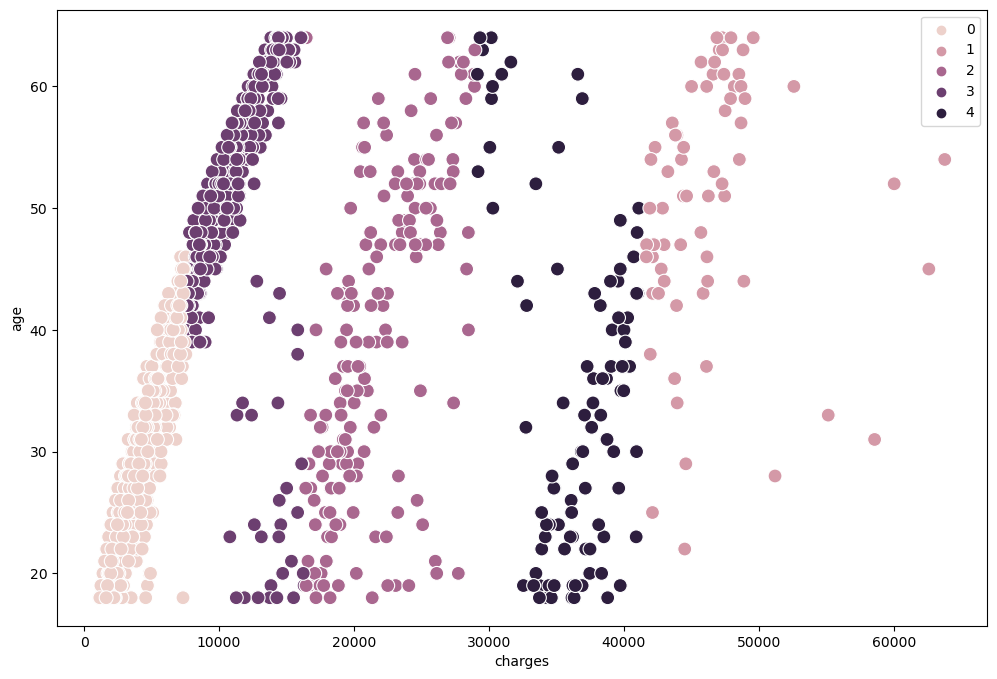

In [56]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['charges'], y=df['age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('charges') # Label x-axis.
plt.ylabel('age') # Label y-axis.
plt.show()

Cluster 2 shows that charges are higher across all ages. Cluster 1 shows that charges are lower with lower ages. 

In [57]:
df.head()

,age,bmi,children,charges,clusters
0,19,27.900,0,16884.92400,2
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,2
4,32,28.880,0,3866.85520,0


In [58]:
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'black'

/var/folders/zk/lxc3sp7n5rqf4k_sl172k5xh0000gn/T/ipykernel_55170/4072357400.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 2, 'cluster'] = 'purple'


In [59]:
df.groupby('clusters').agg({'age':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'children':['mean', 'median'],
                          'charges':['mean', 'median']})

age               bmi          children              charges  \
               mean median       mean  median      mean median          mean   
clusters                                                                       
0         28.917883   28.0  30.067409  29.820  0.996350    1.0   4132.006367   
1         50.358209   52.0  37.013582  36.385  1.238806    1.0  46585.287077   
2         39.304598   39.5  27.927471  27.550  1.212644    1.0  21743.140039   
3         51.091111   52.0  30.956333  30.800  1.148889    1.0  11083.700349   
4         34.424242   32.0  33.141869  33.110  1.090909    1.0  36356.563067   

                        
                median  
clusters                
0          4066.583075  
1         46113.511000  
2         21227.929030  
3         11014.443300  
4         36837.467000

BMI is about the same for cluster 0,1,2 but charges are from low to meduim. What makes them different is the ages, as the ages go up the charges go up (in clusters 0,1,2). 
The highest BMI does not have the highest charges but is one of the oldest ages. 
Thes stats show that you have to have very low charges and very young, As you increase in age charges vary depending on your BMI. 

These results could be useful to put together groups/ profiles. For examples groups such as young and healthy, old and healthy, old and unhealthy. 

In [60]:
#exporting df
df.to_csv(os.path.join(path,'Data','Prepared Data','cluster.csv'))